# Laboratory 2

Basis of Bayesian inference 

-------

### Creating models using Grid approximation

In [31]:
# define grid 
p_grid <- seq( from=0 , to=1 , length.out=20 )

# define prior 
prior <- rep( 1 , 20 )

# compute likelihood at each value in grid 
likelihood <- dbinom( 6 , size=9 , prob=p_grid )

# compute product of likelihood and prior 
unstd.posterior <- likelihood * prior

# standardize the posterior, so it sums to 1 
posterior <- unstd.posterior / sum(unstd.posterior)

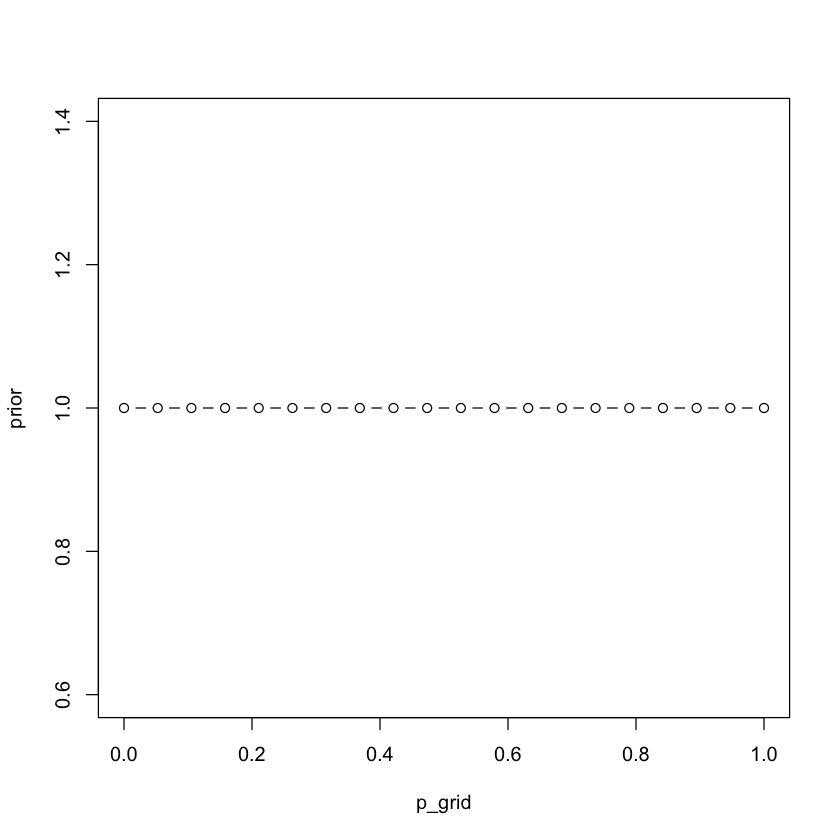

In [32]:
par(bg = 'white')
plot(p_grid, prior, type="b")

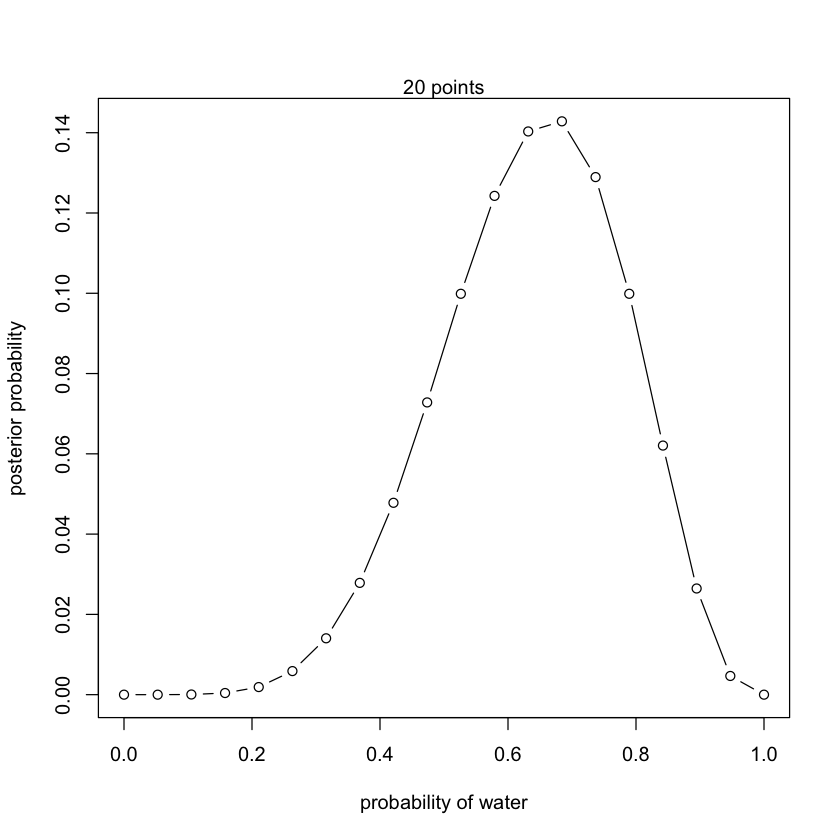

In [33]:
par(bg = 'white')

plot(p_grid , posterior , type="b" , xlab="probability of water" , ylab="posterior probability" ) 
mtext( "20 points" )

#### Different distrubutions of probability x propotions (priors)

Binary prior

In [34]:
prior <- ifelse( p_grid < 0.5 , 0 , 1 )

# compute likelihood at each value in grid 
likelihood <- dbinom( 6 , size=9 , prob=p_grid )

# compute product of likelihood and prior 
unstd.posterior <- likelihood * prior

# standardize the posterior, so it sums to 1 
posterior <- unstd.posterior / sum(unstd.posterior)

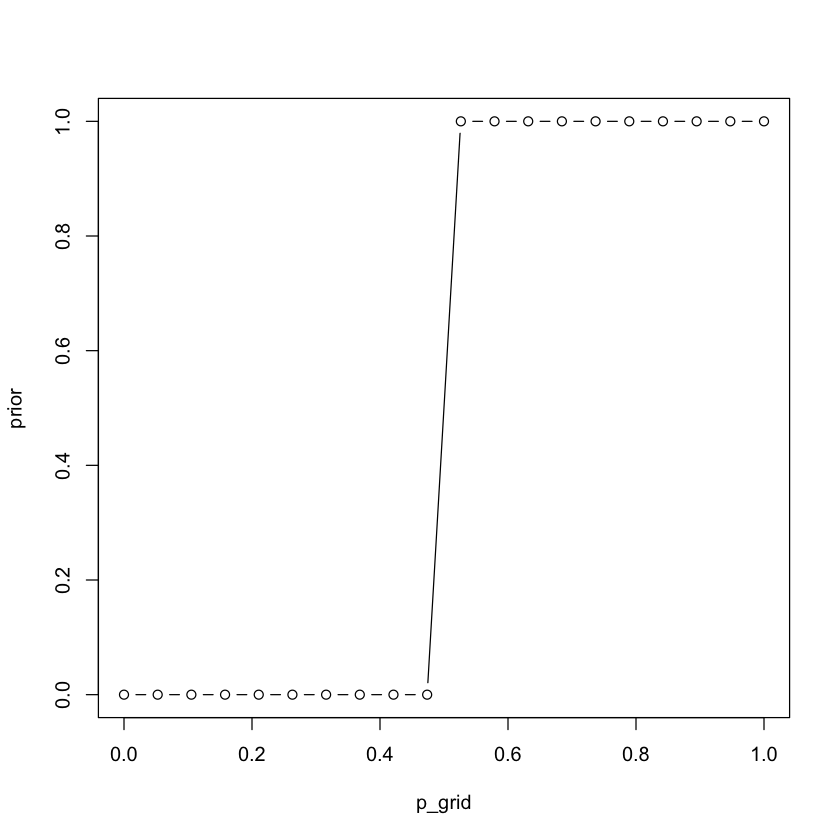

In [35]:
par(bg = 'white')
plot(p_grid, prior, type="b")

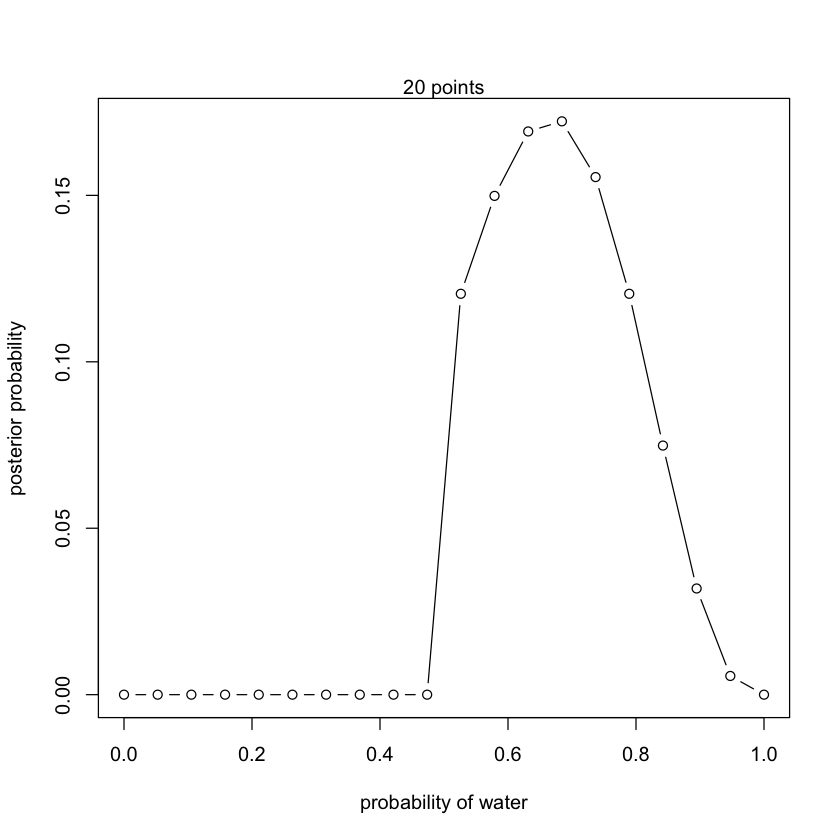

In [36]:
par(bg = 'white')

plot(p_grid , posterior , type="b" , xlab="probability of water" , ylab="posterior probability" ) 
mtext( "20 points" )

Weird prior

In [37]:
prior <- exp( -5*abs( p_grid - 0.5 ) )

# compute likelihood at each value in grid 
likelihood <- dbinom( 6 , size=9 , prob=p_grid )

# compute product of likelihood and prior 
unstd.posterior <- likelihood * prior

# standardize the posterior, so it sums to 1 
posterior <- unstd.posterior / sum(unstd.posterior)

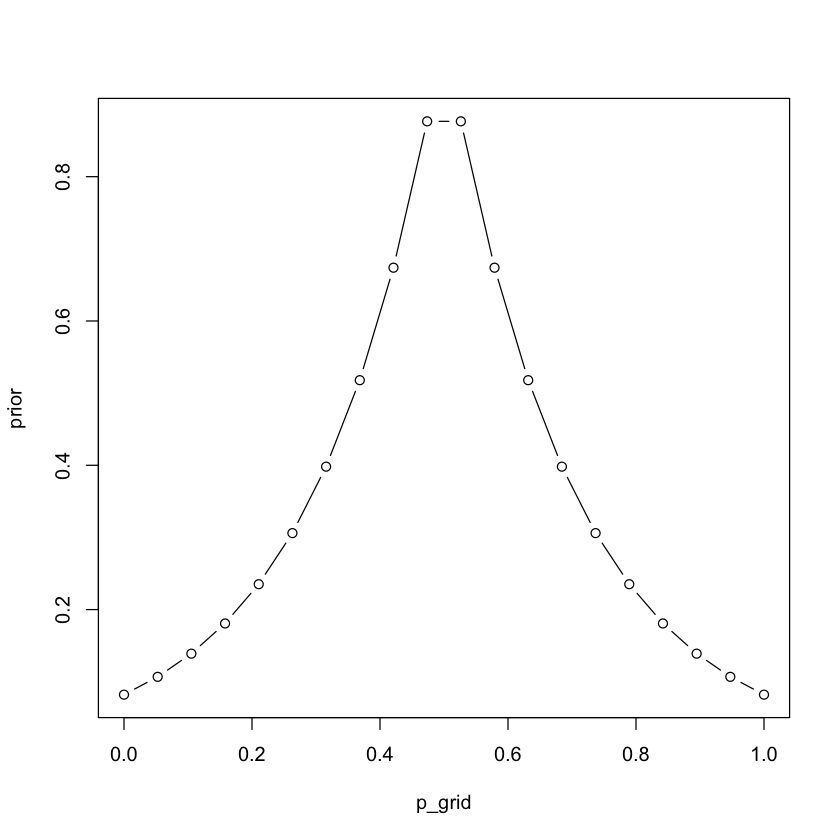

In [38]:
par(bg = 'white')
plot(p_grid, prior, type="b")

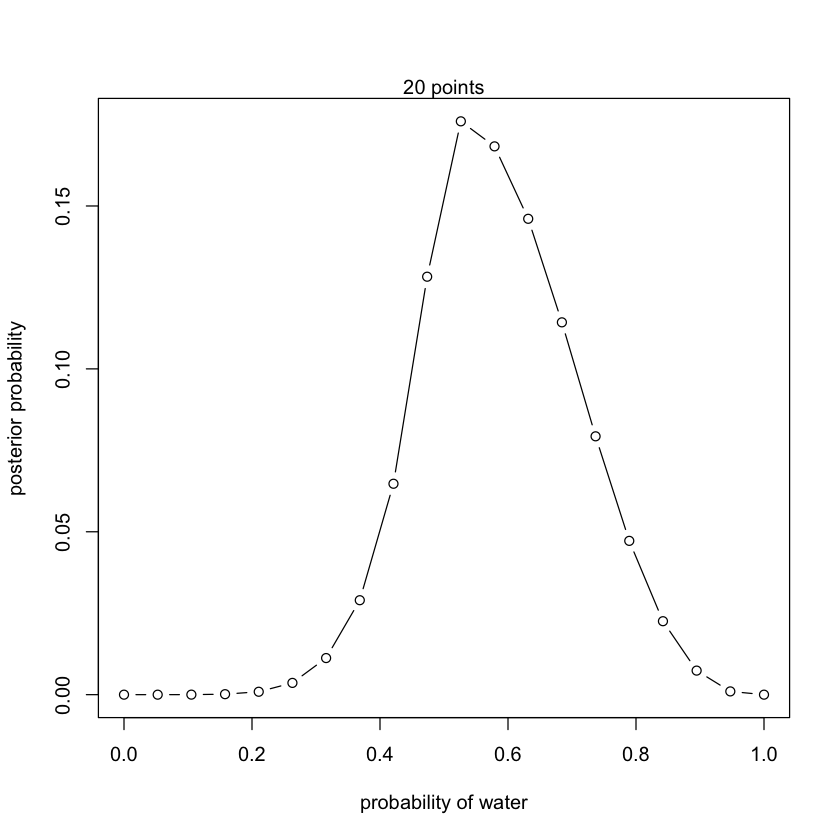

In [39]:
par(bg = 'white')

plot(p_grid , posterior , type="b" , xlab="probability of water" , ylab="posterior probability" ) 
mtext( "20 points" )

------

### Creating models using Quadratic approximation

In [ ]:
library(rethinking)

In [14]:
# define data
data=list(W=17,L=3)

# compute a quap
globe_qa <- quap(
    # A formula or alist of formulas that define the likelihood and priors
    alist( 
        W ~ dbinom( W+L ,p) , # binomial likelihood -> from Bernoulli scheme
        p ~ dunif(0,1) # uniform prior 
    ) , 
    data=data 
)

# summary of quap
summary_globe_qa <- precis(globe_qa)
names(summary_globe_qa)

[1] "mean"  "sd"    "5.5%"  "94.5%"

Posterior mean value of p = 0.67, is the “mean” and it is a peak. The curvature is labeled “sd” and it is the standard deviation of the posterior distribution.

Assuming the posterior is Gaussian, it is maximized at 0.67, and its standard deviation is 0.16.

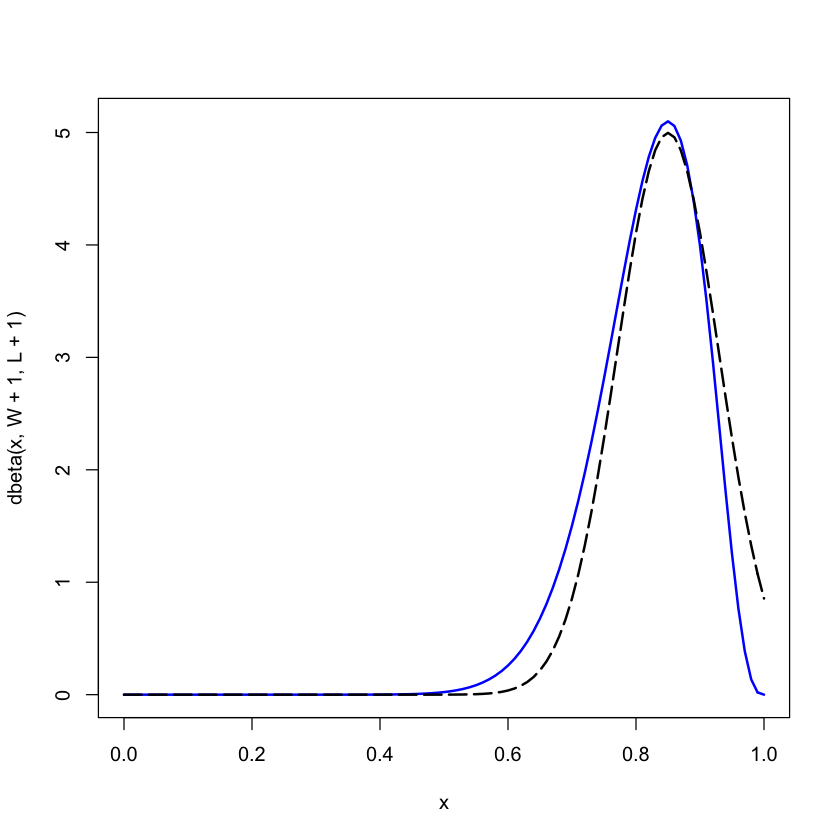

In [101]:
par(bg = 'white')

# analytical calculation 
W <- 17 
L <- 3
curve( dbeta( x , W+1 , L+1 ) , from=0 , to=1, col="blue",lwd=2)

# quadratic approximation 
curve( dnorm( x , summary_globe_qa$mean, summary_globe_qa$sd) , lty=5 , lwd=2, add=TRUE )

You can see the poverty of qa because it assigned positive probability to propotion 1, while we know form data, that there is at least one piece of Land. But it will get better, if we collect more data.

----

### Creating models using Markov chain Monte Carlo

Multilevel models do not always allow us to write down a single, unified function for the posterior distribution. This means that the function to maximize (when finding the MAP) is not known, but must be computed in pieces, so we cannot use quadratic approximation.

In [117]:
n_samples <- 1000 
p <- rep( NA , n_samples ) 
p[1] <- 0.5 
W <- 6 
L <- 3 

for (i in 2:n_samples) {
    p_new <- rnorm( 1 , p[i-1] , 0.1 )
    if ( p_new < 0 ) p_new <- abs( p_new ) 
    if ( p_new > 1 ) p_new <- 2 - p_new 
    
    q0 <- dbinom( W , W+L , p[i-1] ) 
    q1 <- dbinom( W , W+L , p_new )
    
    p[i] <- ifelse( runif(1) < q1/q0 , p_new , p[i-1] )

}

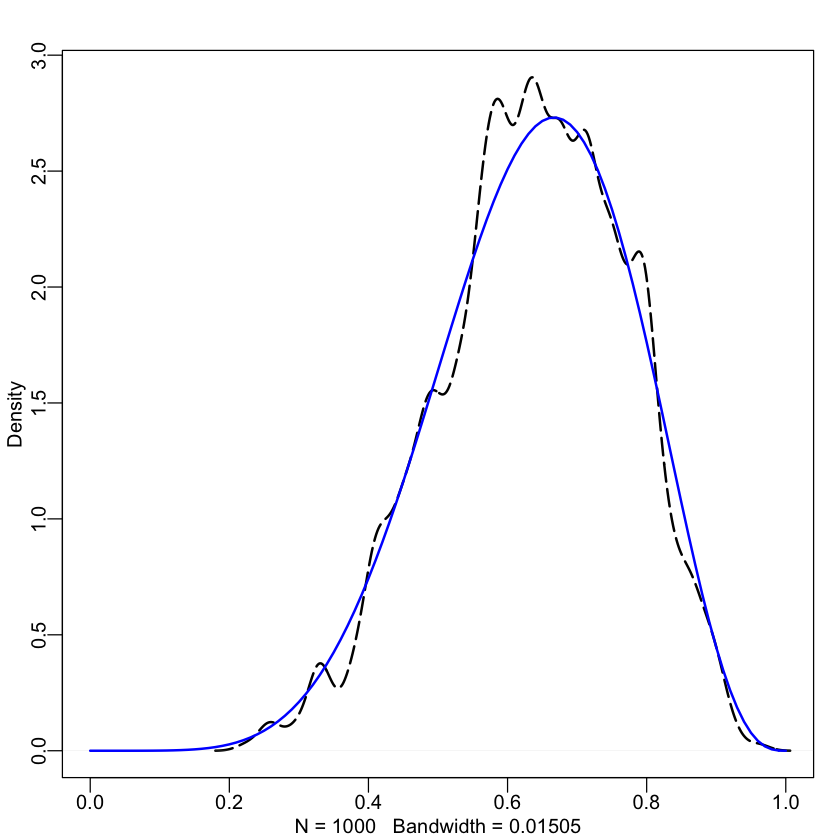

In [116]:
par(bg = 'white')

dens(p, xlim=c(0,1), lty=5 , lwd=2) 
curve(dbeta( x , W+1 , L+1 ) , col="blue",lwd=2, add=TRUE )

------

## Practice

#### 2M1 & 2M2

In [49]:
# define grid 
p_grid <- seq( from=0 , to=1 , length.out=20 )

# uniform prior 
# prior <- rep( 1/2 , 20 )

# binary prior
prior <- ifelse(p_grid < 0.5, 0, 1)

##### W, W, W

In [50]:
# compute likelihood at each value in grid -> Bernoulli
likelihood <- dbinom(3, size=3 , prob=p_grid )

# compute product of likelihood and prior 
unstd.posterior <- likelihood * prior

# standardize the posterior, so it sums to 1 
posterior <- unstd.posterior / sum(unstd.posterior)

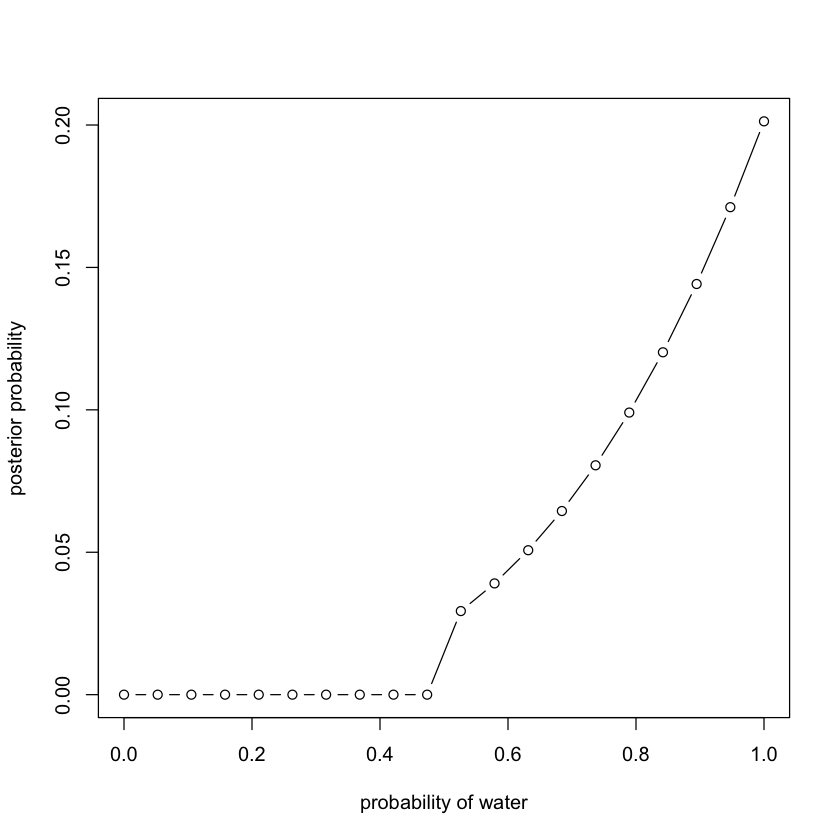

In [51]:
par(bg = 'white')
plot(p_grid , posterior , type="b" , xlab="probability of water" , ylab="posterior probability" ) 

##### W, W, W, L

In [52]:
# compute likelihood at each value in grid -> Bernoulli
likelihood <- dbinom(3, size=4 , prob=p_grid )

# compute product of likelihood and prior 
unstd.posterior <- likelihood * prior

# standardize the posterior, so it sums to 1 
posterior <- unstd.posterior / sum(unstd.posterior)

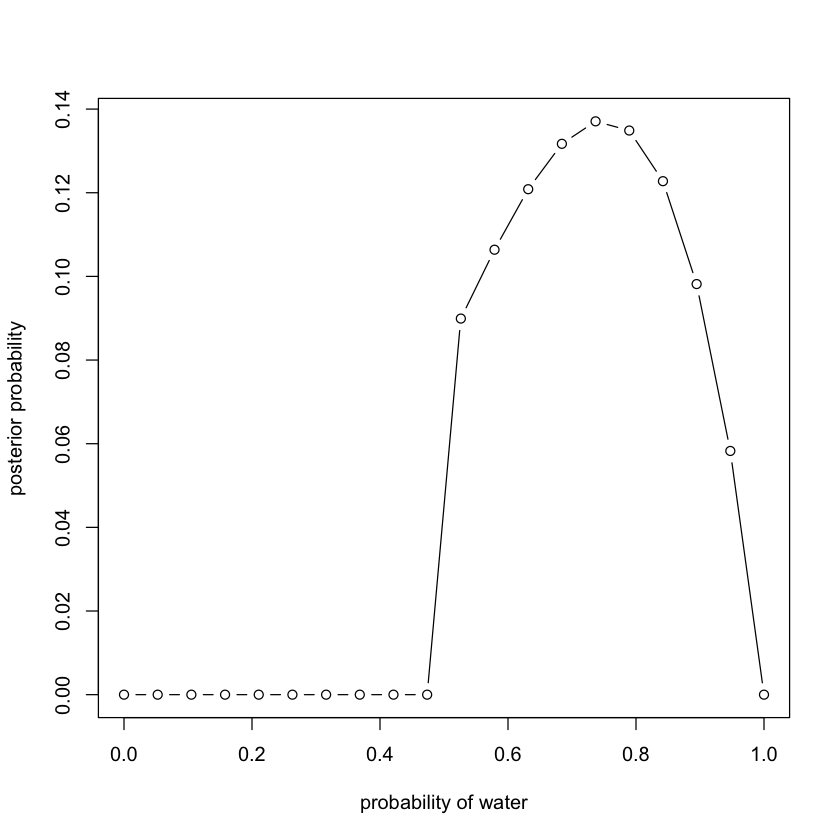

In [53]:
par(bg = 'white')
plot(p_grid , posterior , type="b" , xlab="probability of water" , ylab="posterior probability" ) 

##### L, W, W, L, W, W, W

In [54]:
# compute likelihood at each value in grid -> Bernoulli
likelihood <- dbinom(5, size=7 , prob=p_grid )

# compute product of likelihood and prior 
unstd.posterior <- likelihood * prior

# standardize the posterior, so it sums to 1 
posterior <- unstd.posterior / sum(unstd.posterior)

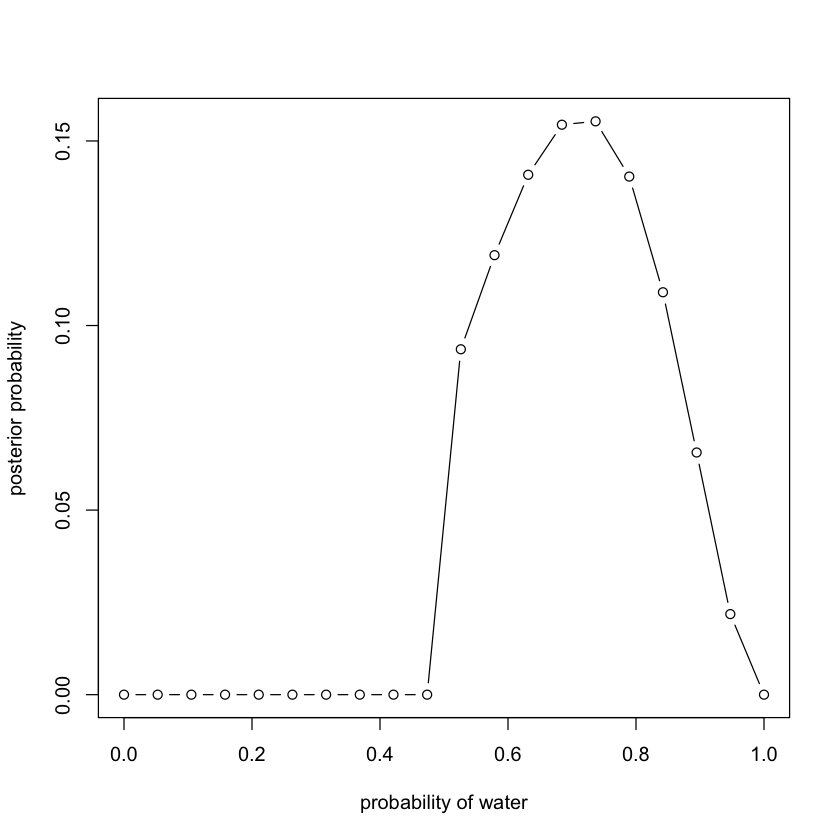

In [55]:
par(bg = 'white')
plot(p_grid , posterior , type="b" , xlab="probability of water" , ylab="posterior probability" ) 

### 2M3

In [182]:
pm = 0
pe = 0.7
p_glob_toss_e = 0.5 # E
p_glob_toss_m = 0.5 # M

P(E|L) = (P(L|E) * P(E))/P(L) ->

In [183]:
p_e_l = ((1-pe) * p_glob_toss_e) / (((1-pm)*p_glob_toss_m + (1-pe)*p_glob_toss_e))
p_e_l

[1] 0.2307692

### 2M4

In [184]:
p_bb = 1/3
p_bw = 1/3
p_ww = 1/3

# probability of B if given drawn card 
pbb = 1
pbw = 1/2
pww = 0

In [185]:
p_bb_b = (pbb * p_bb) / ((pbb*p_bb + pbw*p_bw +pww*p_ww))
p_bb_b

[1] 0.6666667

### 2M5

four cards: B/B, B/W, W/W, and another B/B

In [186]:
p_bb = 1/2
p_bw = 1/4
p_ww = 1/4

# probability of B if given drawn card 
pbb = 1
pbw = 1/2
pww = 0

In [187]:
p_bb_b = (pbb*p_bb) / ((pbb*p_bb + pbw*p_bw + pww*p_ww))
p_bb_b

[1] 0.8

### 2M6

cards with black sides are heavier than cards with white sides

In [188]:
p_bb = 1/6 
p_bw = 2/6
p_ww = 3/6

# probability of B if given drawn card 
pbb = 1
pbw = 1/2
pww = 0

In [189]:
p_bb_b = (pbb * p_bb) / ((pbb*p_bb + pbw*p_bw +pww*p_ww))
p_bb_b

[1] 0.5

### 2M7

Single card showing a black side face up. Before looking at the other side, we draw another card from the bag and lay it face up on the table. The face that is shown on the new card is white. - B,W

In [206]:
#probability of getting a card
p_bb = 1/3
p_bw = 1/3
p_ww = 1/3

# probability of BW sequance if given first drawn card 
pbb = 3/4 # first is fixed, if second is WW then 1 ; if second is BW then 1/2 ; sum = (1 + 1/2)/2
pbw = 1/4 # first is fixed, then for B is 1/2 chance ; second for W is 1/2 chance between BB and WW
pww = 0



In [207]:
p_bb_BW= (pbb * p_bb) / ((pbb*p_bb + pbw*p_bw + pww*p_ww))
p_bb_BW

[1] 0.75

### 2H1

Female panda of unknown species, and she has just given birth to twins. What is the probability that her next birth will also be twins?

IMO: giving births are independent events, so our question is: what is the probability of giving birth to twin.

P(T) = P(T|s1) * P(s1) + P(T|s2) * P(s2)

In [208]:
p_s1 = 1/2
p_s2 = 1/2

p_twins_s1 = 0.1
p_twins_s2 = 0.2

In [209]:
p_TT = (p_twins_s1*p_s1 + p_twins_s2*p_s2)
p_TT

[1] 0.15

### 2H2

Compute the probability that the panda we have is from species A, assuming we have observed only the first birth and that it was twins.

P(s1|T) = P(T|s1) * P(s1) / P(T)

In [210]:
p_s1 = 1/2
p_s2 = 1/2

p_twins_s1 = 0.1
p_twins_s2 = 0.2

In [205]:
p_s1_T= (p_twins_s1 * p_s1) / (p_twins_s1*p_s1 + p_twins_s2*p_s2)
p_s1_T

[1] 0.3333333

### Labs

We usually deal with the models that are express wih the conditional distribution. 

**P(dependent | some_params, some_indep_vars)**

Linear model:

yi = B0 + B1xi1 + ... Bnxin + epsilon ; epsilon has normal distr.


jesli wezmiemy na sztywno wszystkie paramery procz błędu epsilon, to reszta bedzie stałą, która jest dodawana do dystrybucji epsilonu -> ptzesuwamy dystrybucje (jego srednią), wiec to to samo, co :

**y ~ N(B0 + B1xi1 + ... Bnxin), std) => p(y | B0, B1, ...Bn, x1, ..,xn, std)** wiec potrzebujemy dystrybucje B, mamy dane X, i mamy dystrybucje std (sigma).

Więc modele Bayesowskie to nic wiecej jak:

**p(y | Theta) = p(y| Theta) * P(Theta) ; Theta=parametry** (dystrybucje parametrów)

Mimo wszystko, to wszystko statystyczne modele, regresja, bayesy, z których nie możemy wnioskować o przyczynowości - bo opisujemy tylko dystrybucje danych, a nie dotykamy interwencji.

*Next week: Bayesian linear models*

---------

### Stan testing

In [211]:
library("rstan") # observe startup messages

options(mc.cores = parallel::detectCores())
rstan_options(auto_write = TRUE)

In [227]:
stan(
    model_code = 'data{ real y[1]; } parameters{ real mu; } model{ y ~ normal(mu, 1); }', 
    data = list(y = as.array(1)), 
    # pars = 'mu'
)

recompiling to avoid crashing R session



Inference for Stan model: 58b7f9d5a6ae2357a1dd872a840aa998.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

      mean se_mean   sd  2.5%   25%   50%   75% 97.5% n_eff Rhat
mu    0.97    0.03 1.00 -0.93  0.31  0.96  1.64  2.97  1537    1
lp__ -0.50    0.02 0.71 -2.41 -0.68 -0.22 -0.05  0.00  1814    1

Samples were drawn using NUTS(diag_e) at Wed Oct 20 13:28:26 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

In [7]:
schools_dat <- list(J = 8, 
                    y = c(28,  8, -3,  7, -1,  1, 18, 12),
                    sigma = c(15, 10, 16, 11,  9, 11, 10, 18))

In [8]:
fit <- stan(file = 'schools.stan', data = schools_dat)

Warning message:
“There were 2 divergent transitions after warmup. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup
to find out why this is a problem and how to eliminate them.”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”


In [9]:
print(fit)

Inference for Stan model: schools.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

           mean se_mean   sd   2.5%    25%    50%    75%  97.5% n_eff Rhat
mu         8.13    0.15 5.10  -2.08   4.91   8.12  11.21  18.93  1090    1
tau        6.36    0.15 5.32   0.20   2.35   5.01   9.05  20.08  1283    1
eta[1]     0.37    0.02 0.95  -1.57  -0.25   0.38   1.01   2.21  3032    1
eta[2]     0.00    0.02 0.89  -1.73  -0.59   0.00   0.58   1.78  3068    1
eta[3]    -0.19    0.02 0.92  -1.99  -0.82  -0.20   0.43   1.65  3046    1
eta[4]    -0.04    0.02 0.88  -1.75  -0.62  -0.03   0.56   1.72  3209    1
eta[5]    -0.34    0.02 0.89  -2.03  -0.95  -0.38   0.23   1.51  2602    1
eta[6]    -0.22    0.02 0.92  -1.99  -0.84  -0.25   0.38   1.60  2823    1
eta[7]     0.35    0.02 0.91  -1.49  -0.23   0.37   0.95   2.13  3009    1
eta[8]     0.06    0.02 0.93  -1.76  -0.56   0.06   0.70   1.87  3670    1
theta[1]  11.30    0.1

'pars' not specified. Showing first 10 parameters by default.

ci_level: 0.8 (80% intervals)

outer_level: 0.95 (95% intervals)



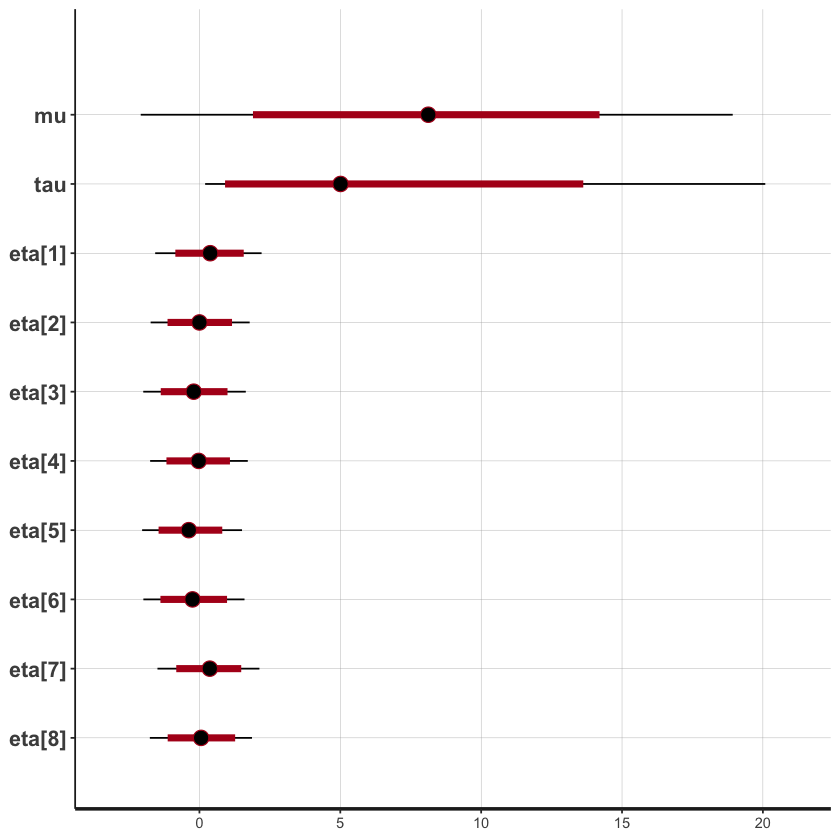

In [10]:
plot(fit)